This code was intended to analyze the data in the ignition points dataset, but it was finally not used anywhere during the project

In [54]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from get_plot import get_plot
from scipy import sparse
from shapely.geometry import Point, Polygon, LineString
import pandas as pd
import statistics
import plotly.express as px

coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
# mpl.rcParams['savefig.pad_inches'] = 0


# This code is processed 
# I have manually processed every file using this format

In [55]:
target_limit =  "limits_4326" 
xmin, xmax, ymin, ymax = (coords[target_limit]["xmin"]), (coords[target_limit]["xmax"]), (coords[target_limit]["ymin"]), (coords[target_limit]["ymax"])

In [81]:
gdf = gpd.read_file(r"D:\Users\xubil\OneDrive\Documents\Wildfires Data\Feux_pt_ori_SHP\FEUX_PT_ORI_1972_2022.shp") # Path to the shapefile 

In [57]:
causes = ["Humaine", "Foudre"]
gdf = gdf.to_crs(4326)

In [58]:
gdf["ANNEE"].unique()

array([2022, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [59]:
gdf = gdf.loc[gdf["ANNEE"] >= 2000]

In [60]:
gdf["ANNEE"].unique()

array([2022, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [61]:
gdf.loc[gdf["CAUSE"] == "Foudre"].shape

(4349, 13)

In [62]:
gdf.loc[gdf["CAUSE"] == "Humaine"].shape

(9498, 13)

In [63]:
gdf.shape

(13847, 13)

In [64]:
gdf

,OBJECTID,CLE,ANNEE,NOFEU,SECTION,CAUSE,DATE_DEBUT,DATE_RAPPO,DATE_ETEIN,SUP_HA,LATITUDE,LONGITUDE,geometry
0,1,20221080001,2022,1,Intensive,Humaine,2022-04-06,2022-04-06,2022-04-06,0.4,45.1289,-72.1135,POINT (-72.11350 45.12890)
1,2,20221080002,2022,2,Intensive,Humaine,2022-04-12,2022-04-12,2022-04-12,0.5,45.6624,-74.3352,POINT (-74.33520 45.66240)
2,3,20221080003,2022,3,Intensive,Humaine,2022-04-12,2022-04-12,2022-04-12,0.0,45.6734,-74.3641,POINT (-74.36410 45.67340)
3,4,20221080004,2022,4,Intensive,Humaine,2022-04-12,2022-04-12,2022-04-12,0.6,45.9701,-77.1305,POINT (-77.13050 45.97010)
4,5,20221080005,2022,5,Intensive,Humaine,2022-04-18,2022-04-18,2022-04-18,0.4,45.7227,-74.3818,POINT (-74.38180 45.72270)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43235,0,20211080621,2021,621,Intensive,Humaine,2021-10-28,2021-10-28,2021-10-28,0.0,45.4606,-72.1554,POINT (-72.15540 45.46060)
43236,0,20211080622,2021,622,Intensive,Humaine,2021-11-09,2021-11-09,2021-11-11,2.0,45.9512,-75.8547,POINT (-75.85470 45.95120)
43237,0,20211080623,2021,623,Intensive,Humaine,2021-11-11,2021-11-11,2021-11-11,0.0,45.9812,-74.2104,POINT (-74.21040 45.98120)
43238,0,20211080624,2021,624,Intensive,Humaine,2021-11-10,2021-11-16,2021-11-16,0.0,45.3931,-72.1209,POINT (-72.12090 45.39310)


In [65]:
months = {}

for i in range(1, 13):
    months[i] = 0

In [66]:
for fire in gdf.iterrows():
    # print(fire[1])

    if (fire[1]["DATE_DEBUT"] is None):
        continue

    month = int(fire[1]["DATE_DEBUT"][5:7])
    months[month]+=1
    

In [82]:
years = gdf["ANNEE"].unique()
ycounts = {}

for year in years:
    ycounts[year] = 0

In [83]:
for fire in gdf.iterrows():
    # print(fire[1])

    if (fire[1]["DATE_DEBUT"] is None):
        continue

    year = int(fire[1]["DATE_DEBUT"][0:4])
    ycounts[year]+=1

In [73]:
months

{1: 0,
 2: 0,
 3: 33,
 4: 1366,
 5: 3627,
 6: 2775,
 7: 2674,
 8: 2091,
 9: 876,
 10: 302,
 11: 100,
 12: 3}

Text(0.5, 1.0, 'Number of Fires per Month')

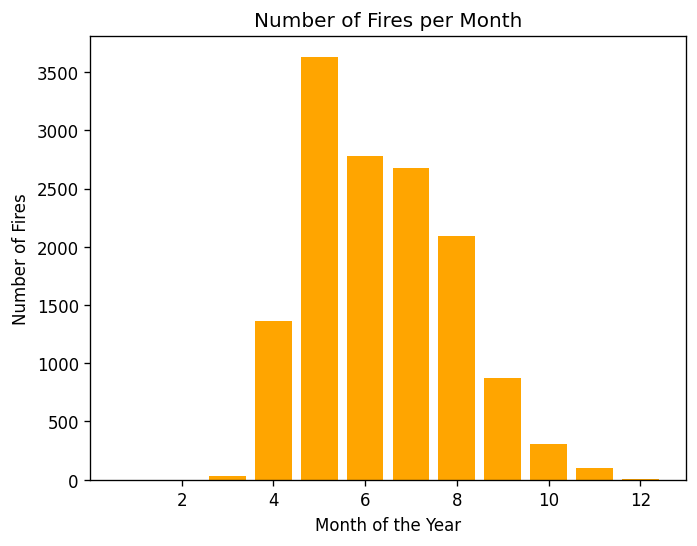

In [79]:
plt.bar(*zip(*months.items()), color="orange")
plt.xlabel("Month of the Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires per Month")

Text(0.5, 1.0, 'Number of Fires per Year')

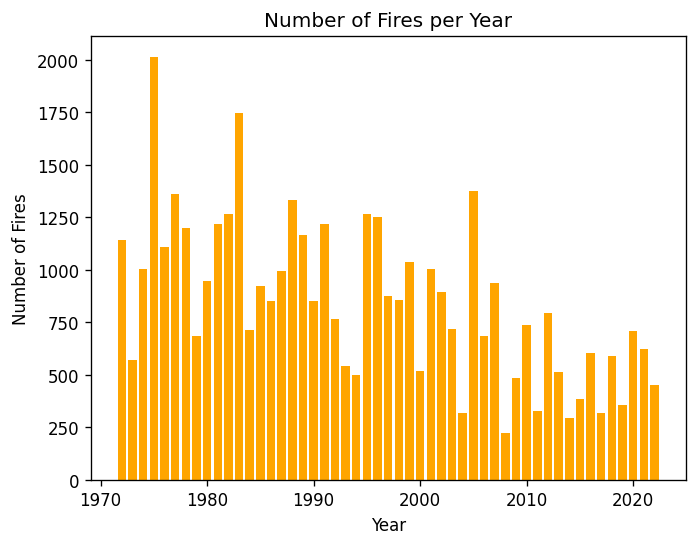

In [84]:
plt.bar(*zip(*ycounts.items()), color="orange")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires per Year")

In [29]:
gdf.iloc[idx]["DATE_DEBUT"] is None

True

In [12]:
int(gdf.iloc[0]["DATE_DEBUT"][5:7])

4

In [3]:
fires = sparse.load_npz(r"D:\Users\xubil\OneDrive\Documents\Wildfires Data NPZ\Training\Feux.npz")

In [4]:
fires.count_nonzero()

221321178

In [3]:
from scipy import sparse ; feuillu = sparse.load_npz("N Foret Feuillu.npz").todense() ; melange = sparse.load_npz("N Foret Melange.npz").todense() ; resineux = sparse.load_npz("N Foret Resineux.npz").todense()

KeyboardInterrupt: 

In [36]:
fires.shape

(46080, 75438)

In [39]:
feuillu.shape

(46080, 73557)

In [44]:
overlap = 0

for i in range(fires.shape[0]):
    print(i)
    for j in range(fires.shape[1]):
        # print(fires[i, j])
        # print(j)

        if (fires[i, j] > 0 and feuillu[i, j] > 0):
            overlap+=1
    
    # break

0
1


KeyboardInterrupt: 